
# Assignment on CNN

**Import required libraries**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Load dataset**

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels[0]

9

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

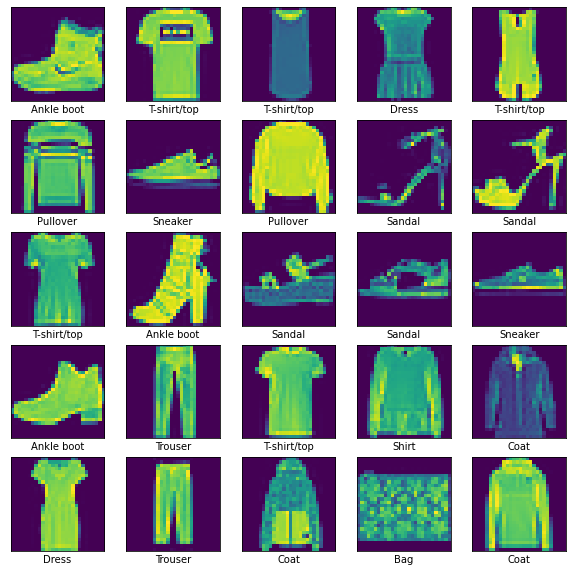

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
#one hot encoding
from tensorflow.keras.utils import to_categorical
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

In [11]:
train_labels_oh[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

**Fit the model**

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [15]:
history = model.fit(train_images, train_labels_oh, epochs=10, 
                    validation_data=(test_images, test_labels_oh))

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.4543 - accuracy: 0.8410 - val_loss: 0.3782 - val_accuracy: 0.8646
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3083 - accuracy: 0.8910 - val_loss: 0.3074 - val_accuracy: 0.8884
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2637 - accuracy: 0.9054 - val_loss: 0.2898 - val_accuracy: 0.8969
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2333 - accuracy: 0.9158 - val_loss: 0.2844 - val_accuracy: 0.8957
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2095 - accuracy: 0.9237 - val_loss: 0.2769 - val_accuracy: 0.9018
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1909 - accuracy: 0.9299 - val_loss: 0.2596 - val_accuracy: 0.9092
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1709 - accuracy: 0.9375 - val_loss: 0.2648 - val_accuracy

**Evaluate Model**

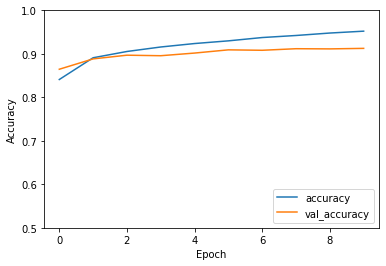

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

There is a slight tendency for overfitting

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_oh, verbose=2)

313/313 - 1s - loss: 0.2774 - accuracy: 0.9126 - 675ms/epoch - 2ms/step


The model is fitted with an accuracy of 91.26%

**Test the model**

1/1 [==============================] - 0s 14ms/step


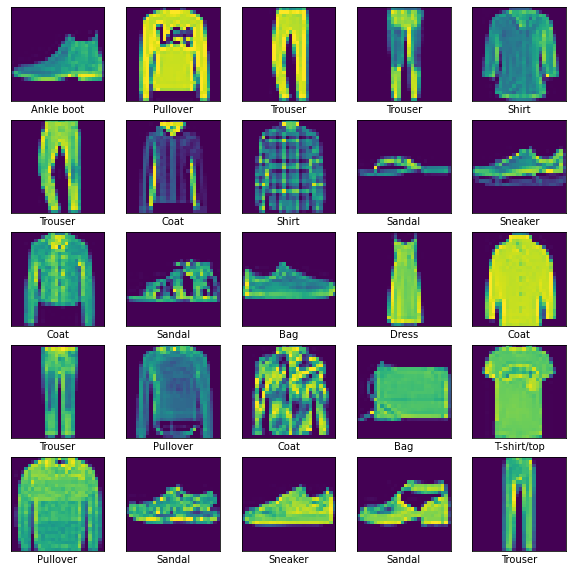

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    y_pred = model.predict(test_images[i].reshape(1,28,28,1))
    plt.xlabel(class_names[np.argmax(y_pred)])
plt.show()

Model has classified the test images almost acccurately